<h1> Brain Tumour Classification

In this Notebook you will design your own model for the identification and classification of brain tumour.

The dataset can be found over <a href = "https://drive.google.com/file/d/1IhdM-fzj-Egyy8-frVDs04LVW7Y3r4on/view?usp=sharing">here.</a>

Download the Dataset and unzip it in a Folder

### We will first import the libraries required to load and preprocess the Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tf.config.experimental.set_memory_growth(physical_devices[0], True)
physical_devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]



<p> There are two ways to preprocess the dataset 
<ul>
    <li> Using the <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory">flow_from_directory</a> function of the <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">ImageDataGenerator</a> class where the data is automatically divided into classes. We can include image augmentation and preprocessing in this itself which will lead to less memory usage as the augmented images are loaded directly and not stored anywhere</li>
    <li> Using the <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">ImageDataGenerator</a> to create a data generator and dividing your data into classes on your own. In this case the generator created by you will be used in the training directly</li>
</ul>
<br>
<p> Try both the approaches once. In the first approach you will need to to create a generator first and then use the <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory">flow_from_directory</a> function on the datagen with the path of the training or validation dataset as one of the arguments.  

Feel free to choose any other methods also (<a href = "https://www.tensorflow.org/api_docs/python/tf/data/Dataset">Dataset</a> API)

In [4]:
# method 1 as an example

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range= 0.1,
    horizontal_flip=True,
    fill_mode = "reflect" #Data augmentation
)

val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory(
    '/content/drive/MyDrive/helloFOSS-21-dAIgnose-main/Brain-Tumor-Classification-DataSet/Training', #training path
    target_size=(256, 256),
    batch_size=32,
    class_mode = 'categorical'
)

val = val_gen.flow_from_directory(
    '/content/drive/MyDrive/helloFOSS-21-dAIgnose-main/Brain-Tumor-Classification-DataSet/Testing', #validation path
    target_size=(256, 256),
    batch_size=32,
    class_mode = 'categorical'
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [5]:
# Try executing method 2 on your own

<p>Next step is designing the architecture of the model

Do checkout the <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/Sequential">Sequential</a> API, <a href = "https://www.tensorflow.org/api_docs/python/tf/keras/Model">Model</a> API and the <a href = "https://www.tensorflow.org/guide/keras/functional">Functional</a> API

In [6]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Dropout(0.2)) 

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu')) 
model.add(tf.keras.layers.Dense(4,activation='softmax')) 

#add different layers in the model using model.add(...)

<p> Choose suitable Loss Functions, optimizers and metrics 

In [7]:
model.compile(optimizer =  'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

<p> Print the model summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 127, 127, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        2

<p>Train the model using the fit method

In [9]:
DESIRED_ACCURACY = 0.999

class myCallback_1(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > DESIRED_ACCURACY:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True
        
stop = myCallback_1()

checkpoint_filepath = '/content/drive/MyDrive/helloFOSS-21-dAIgnose-main/Brain_Classification_Models'
save = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [10]:
epochs = 50
history = model.fit(
    train,
    epochs=epochs, 
    validation_data = val,
    verbose = 1,
    callbacks = [stop,save],
    steps_per_epoch = 20
)


Epoch 1/50
20/20 [==============================] - 462s 22s/step - loss: 2.3325 - accuracy: 0.4778 - val_loss: 1.6961 - val_accuracy: 0.2665
INFO:tensorflow:Assets written to: /content/drive/MyDrive/helloFOSS-21-dAIgnose-main/Brain_Classification_Models/assets
Epoch 2/50
20/20 [==============================] - 219s 11s/step - loss: 1.3763 - accuracy: 0.5143 - val_loss: 26.6447 - val_accuracy: 0.2665
Epoch 3/50
20/20 [==============================] - 170s 8s/step - loss: 0.9921 - accuracy: 0.5953 - val_loss: 23.4769 - val_accuracy: 0.2665
Epoch 4/50
20/20 [==============================] - 136s 7s/step - loss: 1.0097 - accuracy: 0.6125 - val_loss: 8.4161 - val_accuracy: 0.2665
Epoch 5/50
20/20 [==============================] - 101s 5s/step - loss: 0.9091 - accuracy: 0.6159 - val_loss: 10.4602 - val_accuracy: 0.2665
Epoch 6/50
20/20 [==============================] - 81s 4s/step - loss: 0.8586 - accuracy: 0.6508 - val_loss: 25.5944 - val_accuracy: 0.2665
Epoch 7/50
20/20 [===========

<p> Plot all the graphs of the losses and accuracies

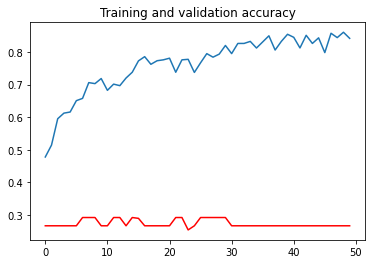

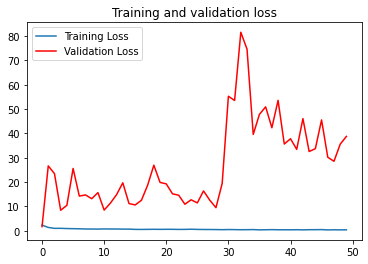

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()